<a href="https://colab.research.google.com/github/luckymi7/OIBSIP/blob/main/Task_3_CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAR PRICE PREDICTION WITH MACHINE LEARNING





In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)


In [ ]:
df = pd.read_csv("/content/raw.githubusercontent.com_amankharwal_Website-data_master_CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['aspiration'].unique()


array(['std', 'turbo'], dtype=object)

In [ ]:
len(df.CarName.unique())

147

In [ ]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
features = df.drop(['price','CarName', 'car_ID', 'boreratio', "compressionratio", 'horsepower', 'enginelocation','drivewheel'], axis=1)
target = df.price

features.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'stroke',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [ ]:
features1 = pd.get_dummies(features)
features1.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'stroke', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
features2 = mms.fit_transform(features1)

In [ ]:
target.dtype

dtype('float64')

# Split the Feature and target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features2, target,test_size=0.25, random_state=4)
print("X_train, X_test, y_train, y_test", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train, X_test, y_train, y_test (153, 44) (52, 44) (153,) (52,)


# Model building

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
clf = RandomForestRegressor(n_estimators=150)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13341.4        13481.32666667  6496.87666667 14950.20111333
 36219.98666667  8372.74666667 16823.78668    14993.96112667
 13957.22       17102.74666667 13482.19333333 16590.70111333
  8957.34666667  6259.27333333  6277.22       29442.88333333
  9157.30888889  9339.32333333 16503.78445333 14160.72111333
 18767.61333333  6500.71        7240.88        9351.24333333
 15504.53333333  5775.62333333  7467.89333333  9043.80333333
  7827.84666667  7641.52333333  7120.14666667 16470.64666667
 20292.21667333  7388.65666667 16010.3        37800.19333333
 14777.22       19830.09333333 16319.22666667 12175.18
  7353.92666667  7946.39333333  6822.28666667  6611.48
  7872.55        6148.64666667 12634.77333333 37800.19333333
  9924.01333333  6327.39333333 17850.04666667  7885.35333333]
mean squeared error:  4212888.367082112


<Axes: xlabel='price', ylabel='Count'>

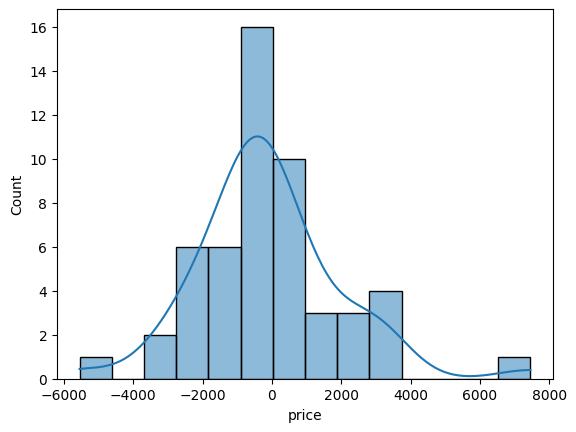

In [ ]:
import seaborn as sns

sns.histplot(y_test - pred, kde=True)

In [ ]:
import matplotlib.pyplot as plt


<BarContainer object of 44 artists>

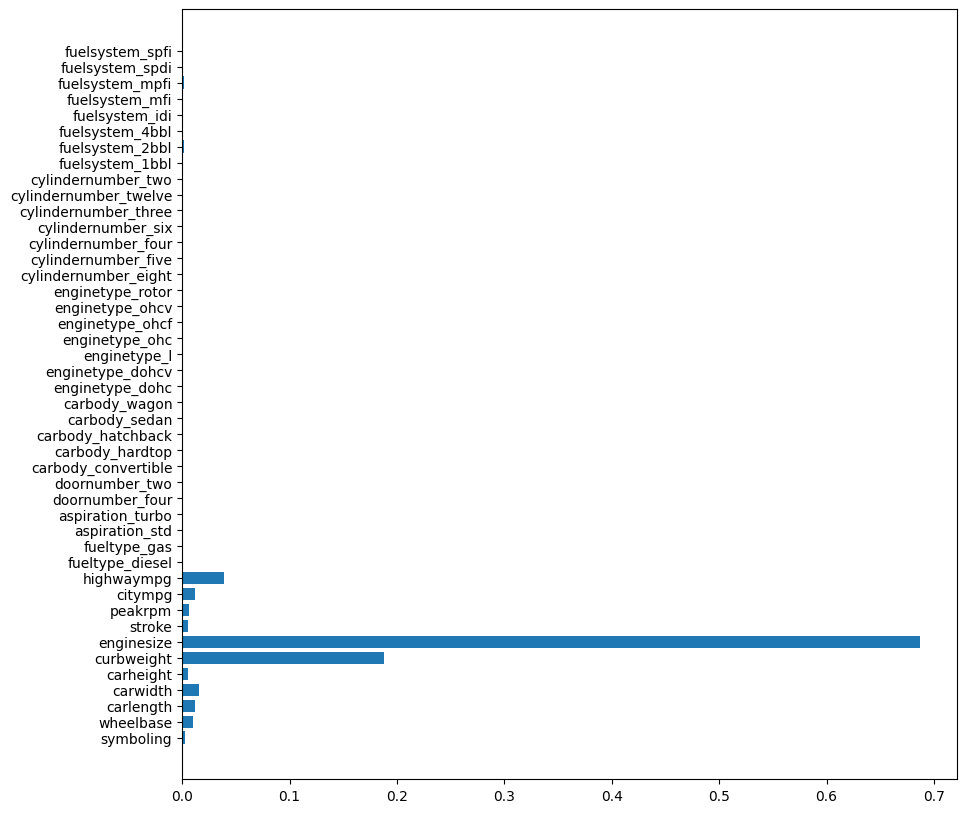

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf.feature_importances_)


In [ ]:
clf2 = SVR(C=45)
clf2.fit(X_train, y_train)

pred = clf2.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [10315.13625846 10122.5574721   9386.2110613  10628.82542715
 10693.69507055 10128.59938188 10608.75262227 10485.11250711
 10093.93145149 10578.30260865 10177.67327623 10218.7720848
 10277.54104177  9680.16382654  9680.56984302 10476.9001731
  9471.51798983 10354.539284   10565.61081801 10125.95775463
 10305.45913557  9375.26692706  9460.10049283  9476.82161398
 10482.84286874  9940.85022034  9499.7534913  10118.52523741
  9503.46602686 10023.18919206  9484.04820012 10537.15174373
 10544.36062807  9500.44952003 10567.3588261  10726.37518564
 10234.81810307 10529.18322528 10282.36401676 10130.3664736
  9482.8468721   9736.06669446  9475.62142513  9396.1796537
 10106.7173958   9373.28523994 10143.0701908  10726.37518564
 10124.23267263  9405.85713106 10477.28008237 10011.73146983]
mean squeared error:  59500481.07559096


In [ ]:
clf3 = DecisionTreeRegressor()
clf3.fit(X_train, y_train)

pred = clf3.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13495.  14489.   6669.  13499.  25552.   8495.  17199.  13495.  12170.
 18280.  16430.  16515.   7975.   6855.   6855.  30760.   8845.   8845.
 16558.  14489.  19045.   6488.   8916.5  8845.  16630.   5399.   7299.
  9980.   7999.   7499.   6692.  17075.  18920.   7299.  16900.  36880.
 12170.  19045.  15985.  11549.   7299.   7775.   6692.   6669.   7775.
  5572.  13950.  36880.   9639.   6229.  21105.   7957. ]
mean squeared error:  4914431.653846154


<BarContainer object of 44 artists>

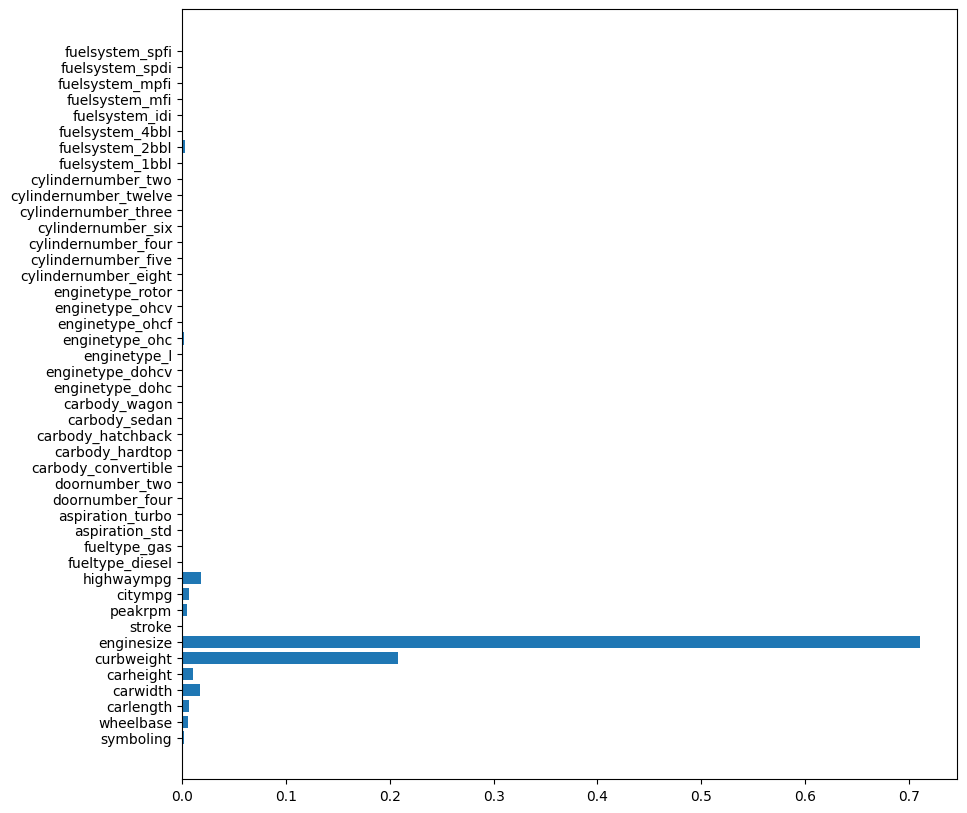

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf3.feature_importances_)

# Hence by considering above model and tuning the parameters, Random forest Regressor works best on it

In [ ]:
# randomized search CV

# no. of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200, num = 12)]

# no. of features to consider at every split
max_feature = ['auto','sqrt']

#maximum no. of levelsin tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#minimum no. of sample required to split a node
min_samples_split = [2,5,10,15,100]

#min. no. samples required at each leaf node
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_random = RandomizedSearchCV(estimator= clf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv= 5, random_state=42, n_jobs= 1)


In [ ]:
rf_random.fit(X_train,y_train)

pred = rf_random.predict(X_test)

mean_squared_error(y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

3805049.277714267